In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np  # Plot input spikes
from matplotlib.gridspec import GridSpec 

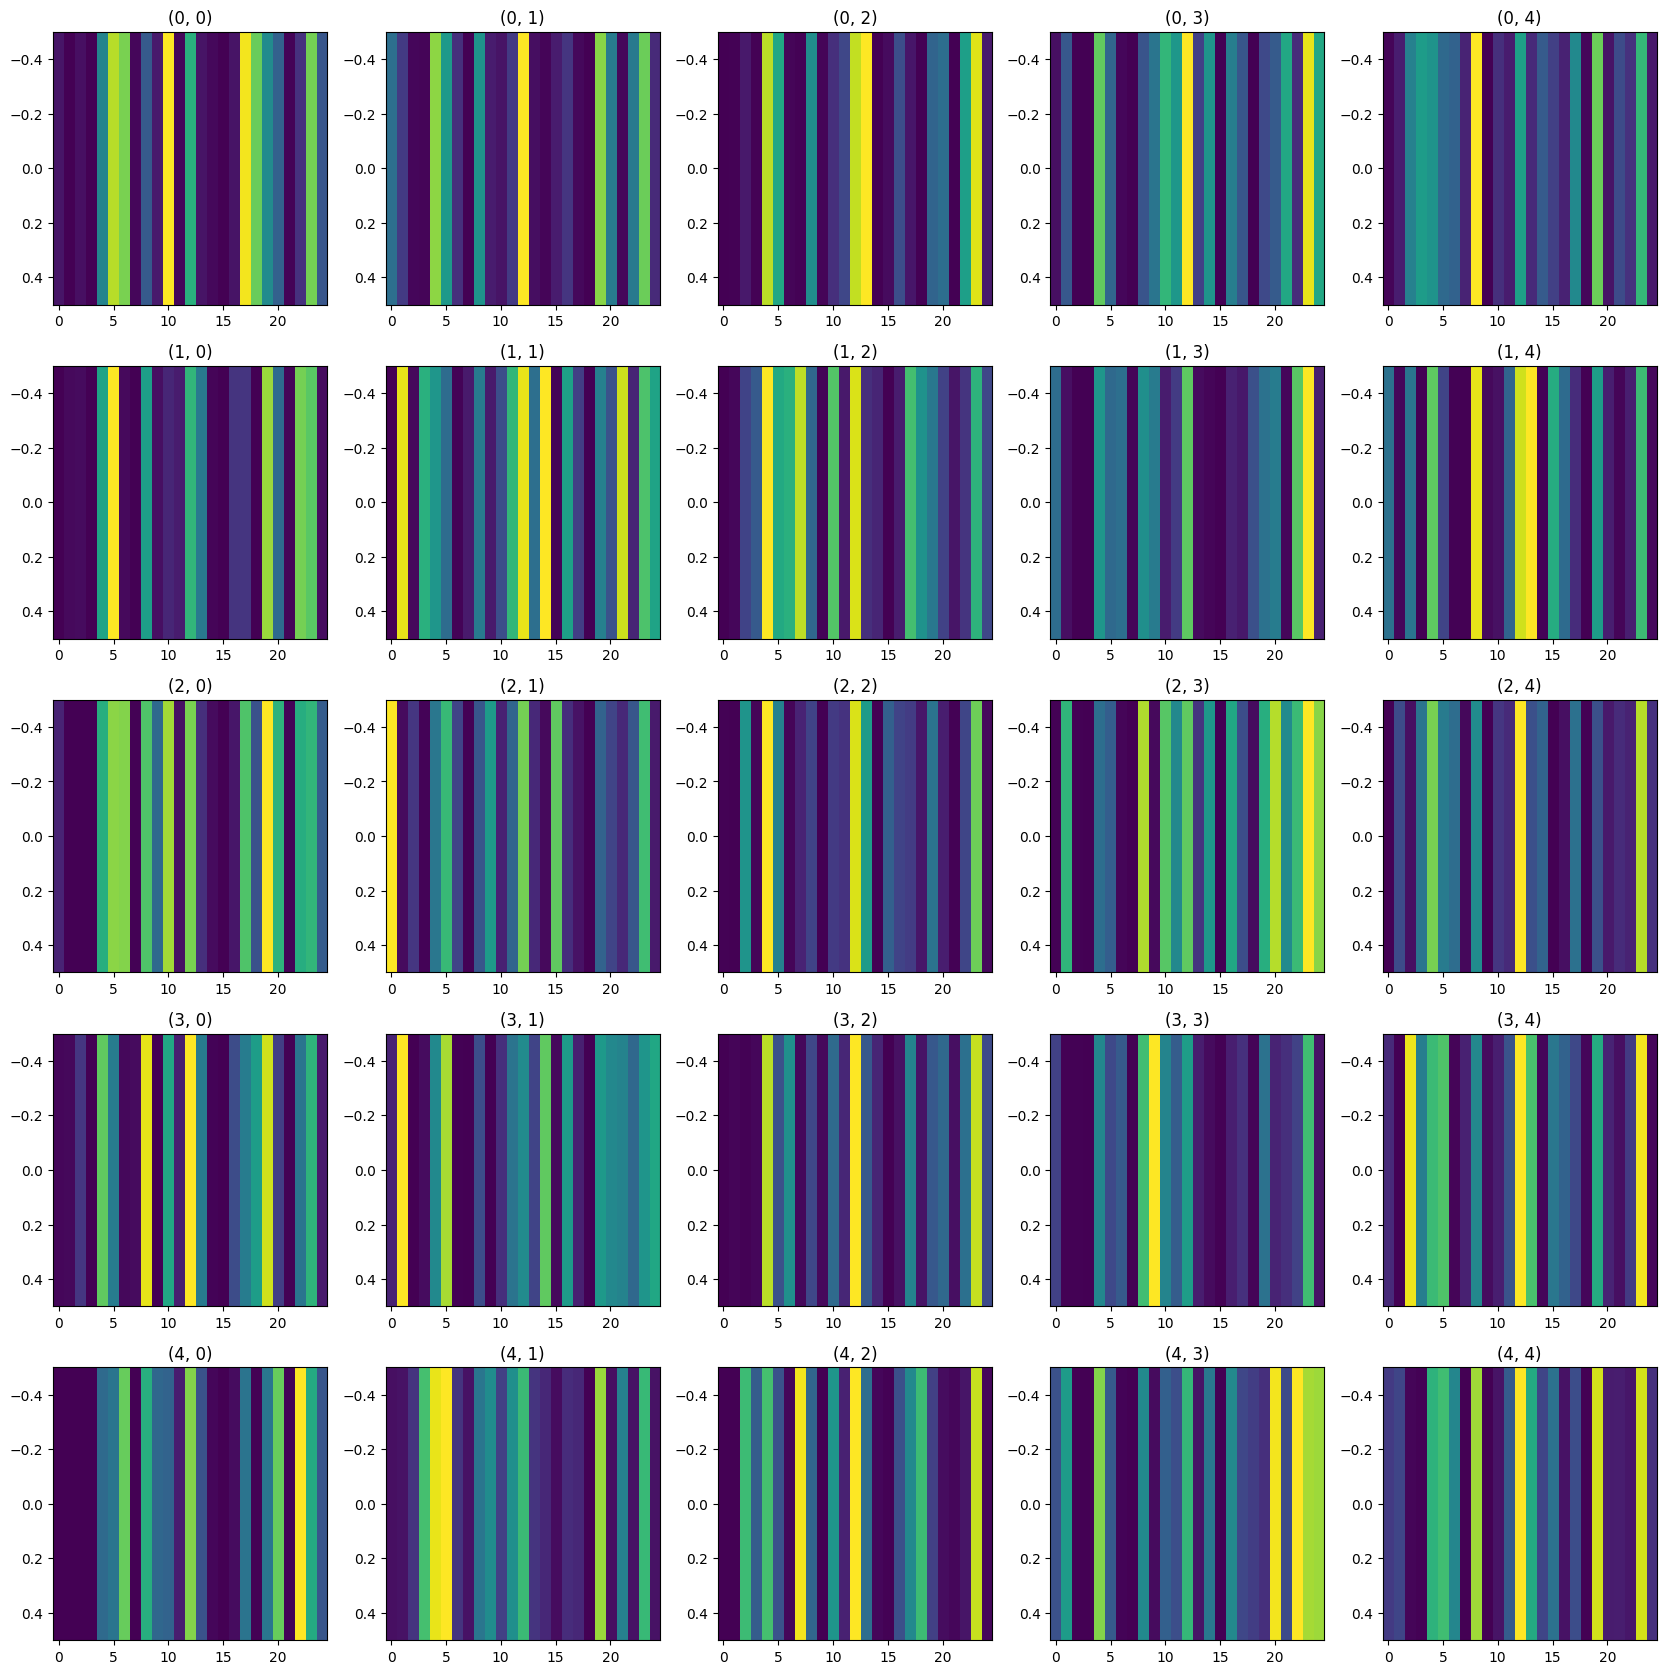

In [2]:
# Plot input spikes
with open('Data/grid_cell_spk_trains.pkl', 'rb') as f:
    spike_trains, labels = pkl.load(f)
with open('Data/grid_cell_spk_trains_sorted.pkl', 'rb') as f:
    spike_trains_sorted = pkl.load(f)
sim_time = spike_trains.shape[1]
positions = np.array([key for key in spike_trains_sorted.keys()])
fig = plt.figure(figsize=(50, 50))
gs = fig.add_gridspec(nrows=15, ncols=15)
for i, pos in enumerate(positions):
  ax = fig.add_subplot(gs[pos[0], pos[1]])
  avg_mem = np.mean(spike_trains_sorted[tuple(pos)], axis=0).reshape(sim_time, -1)
  ax.set_title(f"({pos[0]}, {pos[1]})")
  im = ax.imshow(np.expand_dims(avg_mem.sum(0), axis=0))
  ax.set_aspect('auto')
plt.tight_layout()
plt.show()

In [3]:
# Average of grid cell intensities per position
# With raw samples on side for comparison
with open('Data/grid_cell_intensities_sorted.pkl', 'rb') as f:
    grid_cell_intensities, true_labels = pkl.load(f)
positions = [key for key in grid_cell_intensities.keys()]
for pos in positions[0:5]:
    fig = plt.figure()
    gs = fig.add_gridspec(1, 6)
    ax1 = fig.add_subplot(gs[0, 0])
    avg_intensities = np.mean(grid_cell_intensities[pos], axis=0)
    ax1.imshow(np.expand_dims(avg_intensities, axis=1))
    ax1.set(xticklabels=[])
    ax1.set_title("Avg.")
    for j in range(len(avg_intensities)):
            ax1.text(0, j, f'{avg_intensities[j]:.2f}', color='red')
    random_inds = np.random.choice(range(len(grid_cell_intensities[pos])), 5)
    random_samples = np.array(grid_cell_intensities[pos])[random_inds]
    vmin = np.min(random_samples)
    vmax = np.max(random_samples)
    for i in range(1, 5):
        ax = fig.add_subplot(gs[0, i])
        ax.set_title(f"S{i}")
        rand_sample = grid_cell_intensities[pos][random_inds[i]]
        im = ax.imshow(np.expand_dims(rand_sample, axis=1), vmin=vmin, vmax=vmax)
        ax.set(xticklabels=[])
        ax.set(yticklabels=[])
        for j in range(len(rand_sample)):
            ax.text(0, j, f'{rand_sample[j]:.2f}', color='red')
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    # plt.tight_layout()
    plt.show()

ValueError: too many values to unpack (expected 2)

In [ ]:
# Plot memory module weights
with open('Data/memory_module.pkl', 'rb') as f:
    memory_module = pkl.load(f)
plt.imshow(memory_module.connections['key', 'value'].feature_index['assoc_weight_feature'].value.numpy())
plt.colorbar()

/home/christopher-earl/School/bindsnet/venv/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))

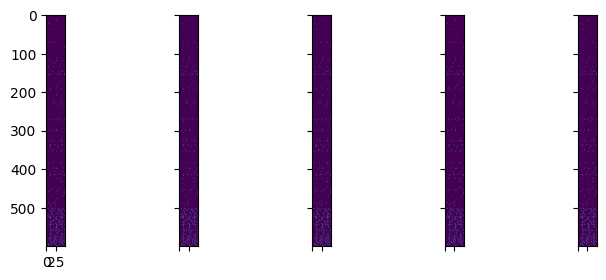

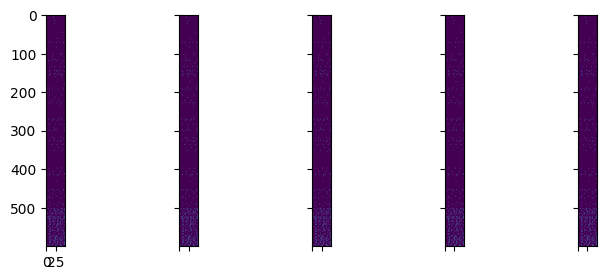

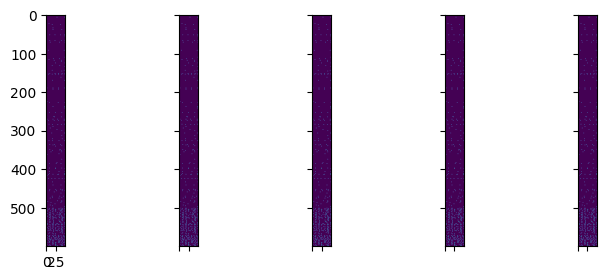

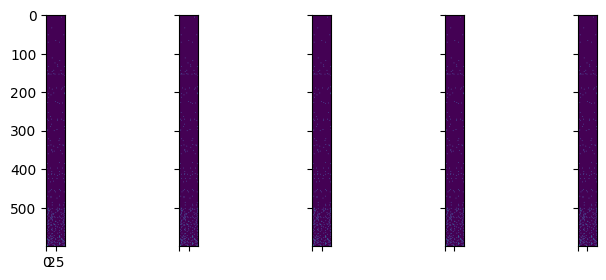

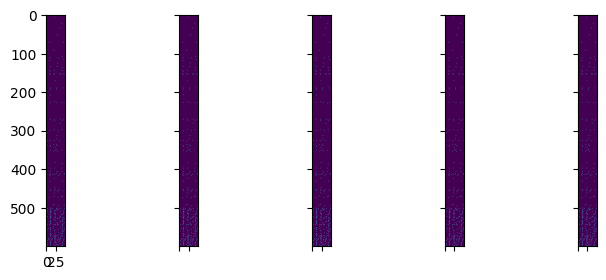

In [4]:
# Plot recalls
with open('Data/recalled_memories.pkl', 'rb') as f:
    recalled_memories, r_labels = pkl.load(f)
with open('Data/recalled_memories_sorted.pkl', 'rb') as f:
    recalled_memories_sorted = pkl.load(f)
positions = np.array([key for key in recalled_memories_sorted.keys()])
rand_inds = np.random.choice(range(len(positions)), 5)
for pos in positions[rand_inds]:
    fig = plt.figure(figsize=(10, 3))
    gs = fig.add_gridspec(1, 6)
    ax1 = fig.add_subplot(gs[0, 0])
    avg_mem = np.mean(recalled_memories_sorted[tuple(pos)], axis=0)
    ax1.imshow(avg_mem.T)
    random_inds = np.random.choice(range(len(recalled_memories_sorted[tuple(pos)])), 5)
    random_samples = np.array(recalled_memories_sorted[tuple(pos)])[random_inds]
    vmin = np.min(random_samples)
    vmax = np.max(random_samples)
    for i in range(1, 5):
        ax = fig.add_subplot(gs[0, i])
        rand_sample = recalled_memories_sorted[tuple(pos)][random_inds[i]]
        im = ax.imshow(np.expand_dims(rand_sample.T, axis=1).squeeze(), vmin=vmin, vmax=vmax)
        ax.set(xticklabels=[])
        ax.set(yticklabels=[])

In [9]:
# Plot reservoir module weights
with open('Data/reservoir_module.pkl', 'rb') as f:
    memory_module = pkl.load(f)
plt.imshow(memory_module.connections['key', 'value'].feature_index['assoc_weight_feature'].value.numpy())
plt.colorbar()

KeyError: ('key', 'value')